In [1]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

Term Frequency (TF):
         0  1  2  3
pet      1  3  0  0
dog      0  1  1  1
cat      1  1  1  2
mouse    1  1  1  1
mammals  1  0  1  0

TF-IDF Weighted Values:
                0         1         2         3
cat      1.080482  0.720321  1.080482  2.160964
dog      0.000000  0.386988  0.580482  0.580482
mammals  1.410964  0.000000  1.410964  0.000000
mouse    0.830482  0.553655  0.830482  0.830482
pet      0.184241  0.368483  0.000000  0.000000


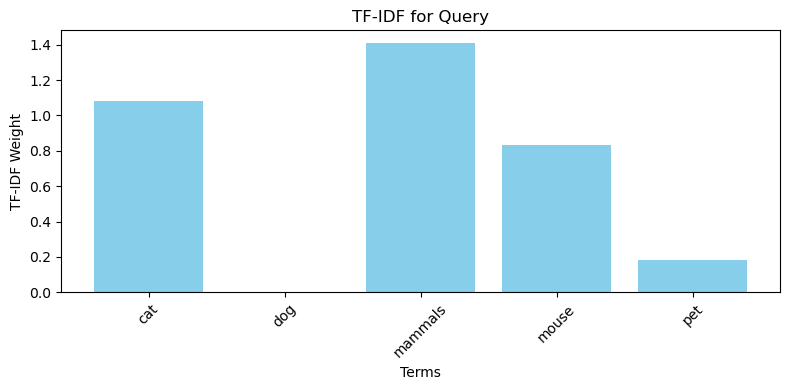

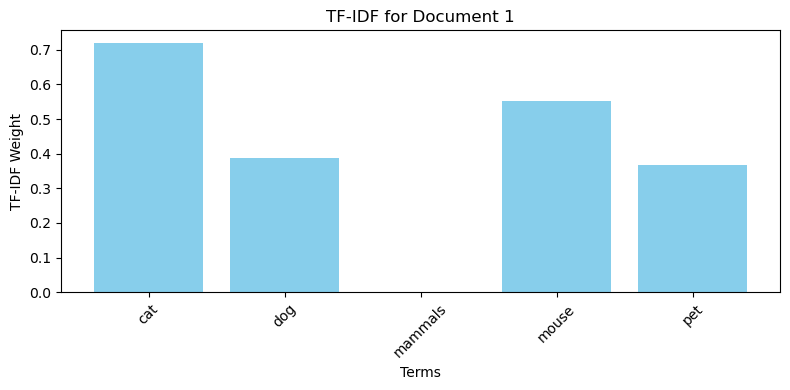

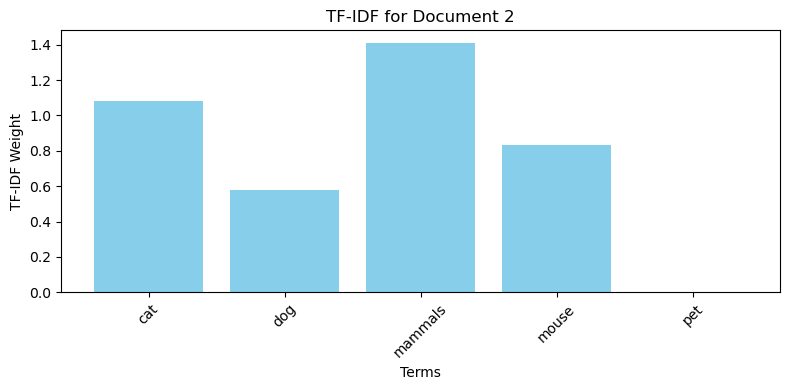

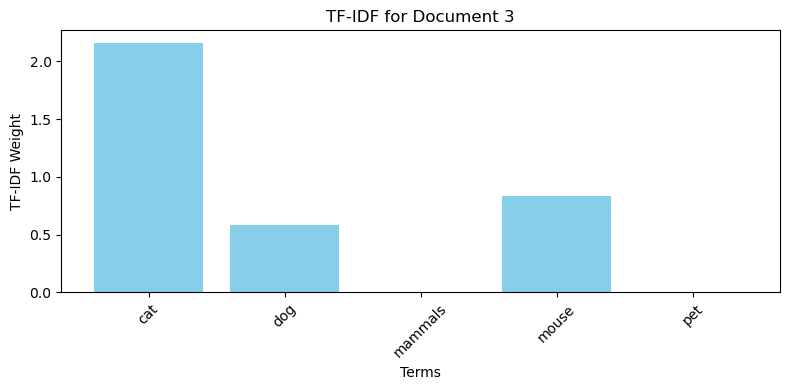

Cosine Similarity (Document 1, Query): 0.6288846426378089
Cosine Similarity (Document 2, Query): 0.9546948111493487
Cosine Similarity (Document 3, Query): 0.6431937393302419


In [3]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##

from typing import List
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def tokenize(text: str) -> List[str]:
    # Remove punctuation using regex, keeping words and numbers
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    # Split the cleaned text into words
    tokens = cleaned_text.lower().split()
    return tokens

# Given terms and document frequencies
terms = ['cat', 'dog', 'mammals', 'mouse', 'pet']  
document_frequency = {'cat': 0.05, 'dog': 0.20, 'mammals': 0.02, 'mouse': 0.1, 'pet': 0.6}


# Example documents
query = ["cat", "mammals", "mouse", "pet"]
d1 = "Cat is a pet, dog is a pet, and mouse may be a pet too."
d2 = "Cat, dog and mouse are all mammals."
d3 = "Cat and dog get along well, but cat may eat a mouse."
d1 = tokenize(d1)
d2 = tokenize(d2)
d3 = tokenize(d3)

# List of all documents tokenized
documents = [d1, d2, d3]

# a) Compute idf for each term
idf = {term: np.log2(1/document_frequency[term]) for term in terms}

# b) Compute term frequency (tf) for each term in each document and query
total_corpus = set(d1).union(set(d2)).union(set(d3)).union(set(query))

# Initialize dictionaries for word counts for each document
word_count_query = dict.fromkeys(total_corpus, 0)
word_count_d1 = dict.fromkeys(total_corpus, 0)
word_count_d2 = dict.fromkeys(total_corpus, 0)
word_count_d3 = dict.fromkeys(total_corpus, 0)

# Count word occurrences in each document
for word in query:
    word_count_query[word] += 1
for word in d1:
    word_count_d1[word] += 1
for word in d2:
    word_count_d2[word] += 1
for word in d3:
    word_count_d3[word] += 1

# Filter word counts by the terms of interest
word_count_query = {k: v for k, v in word_count_query.items() if k in terms}
word_count_d1 = {k: v for k, v in word_count_d1.items() if k in terms}
word_count_d2 = {k: v for k, v in word_count_d2.items() if k in terms}
word_count_d3 = {k: v for k, v in word_count_d3.items() if k in terms}

# Create a DataFrame to display term frequencies
freq = pd.DataFrame([word_count_query, word_count_d1, word_count_d2, word_count_d3])
print("Term Frequency (TF):")
print(freq.T)


# c) Form the tf-idf weighted word occurrence histograms for each document

# get the total size of each document (for size only matters words in terms)
total_size_query = sum(word_count_query.values())
total_size_d1 = sum(word_count_d1.values())
total_size_d2 = sum(word_count_d2.values())
total_size_d3 = sum(word_count_d3.values())

tf_idf_query = {term: word_count_query.get(term, 0) * idf.get(term, 0) / total_size_query for term in terms}
tf_idf_d1 = {term: word_count_d1.get(term, 0) * idf.get(term, 0) / total_size_d1 for term in terms}
tf_idf_d2 = {term: word_count_d2.get(term, 0) * idf.get(term, 0) / total_size_d2 for term in terms}
tf_idf_d3 = {term: word_count_d3.get(term, 0) * idf.get(term, 0) / total_size_d3 for term in terms}

# Create DataFrames for tf-idf values
tf_idf_df = pd.DataFrame([tf_idf_query, tf_idf_d1, tf_idf_d2, tf_idf_d3])
print("\nTF-IDF Weighted Values:")
print(tf_idf_df.T)

def plot_tf_idf_histogram(tf_idf, doc_number):
    terms = list(tf_idf.keys())
    values = list(tf_idf.values())
    
    plt.figure(figsize=(8, 4))
    plt.bar(terms, values, color='skyblue')
    plt.xlabel('Terms')
    plt.ylabel('TF-IDF Weight')
    if doc_number == 0:
        plt.title('TF-IDF for Query')
    else:
        plt.title(f'TF-IDF for Document {doc_number}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the histograms for each document
plot_tf_idf_histogram(tf_idf_query, 0)
plot_tf_idf_histogram(tf_idf_d1, 1)
plot_tf_idf_histogram(tf_idf_d2, 2)
plot_tf_idf_histogram(tf_idf_d3, 3)

# d) Compute the cosine similarity between the documents
def cosine_similarity(doc_vector, query_vector):
    dot_product = np.dot(doc_vector, query_vector)
    norm_doc = np.linalg.norm(doc_vector)
    norm_query = np.linalg.norm(query_vector)
    if norm_doc == 0 or norm_query == 0:  # Avoid division by zero
        return 0.0
    return dot_product / (norm_doc * norm_query)
    
# Convert the TF-IDF dictionaries to vectors for cosine similarity computation
def tf_idf_to_vector(tf_idf_dict, terms):
    return np.array([tf_idf_dict.get(term, 0) for term in terms])

# Convert the query and document TF-IDF values to vectors
tf_idf_vector_query = tf_idf_to_vector(tf_idf_query, terms)
tf_idf_vector_d1 = tf_idf_to_vector(tf_idf_d1, terms)
tf_idf_vector_d2 = tf_idf_to_vector(tf_idf_d2, terms)
tf_idf_vector_d3 = tf_idf_to_vector(tf_idf_d3, terms)

# Compute cosine similarity between the query and each document
similarity_d1 = cosine_similarity(tf_idf_vector_d1, tf_idf_vector_query)
similarity_d2 = cosine_similarity(tf_idf_vector_d2, tf_idf_vector_query)
similarity_d3 = cosine_similarity(tf_idf_vector_d3, tf_idf_vector_query)

# Output the similarity values
print(f"Cosine Similarity (Document 1, Query): {similarity_d1}")
print(f"Cosine Similarity (Document 2, Query): {similarity_d2}")
print(f"Cosine Similarity (Document 3, Query): {similarity_d3}")
##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)

Type your answer here:

Precision = #relevant_retrieved / #total_retrieved
Recall = #relevant_retrieved / #total_relevant

Precision=300/350=0.857
Recall=300/500=0.6

Precision is 85.7%, meaning that 85.7% of the images retrieved by the system were relevant (car images).
Recall is 60%, meaning that 60% of all the car images in the database were retrieved by the system.

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.
https://www.robots.ox.ac.uk/~vgg/practicals/instance-recognition/

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.

Type your answers here: 

Part1:
Stage I.A (two questions)

Questions: 
- Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

SIFT detects keypoints in gradients or areas with high contrast. This is due to an approach that uses Taylor series expansion as threshold for the detection of keypoints, and in low contrast areas it's checked their intensisites.

It can be a problem for matching due to regions with too many keypoints, can lead to ambiguity in matching. Or if one image has fewer keypoints than his pair at a certain area, could generate a mismatch.

To avoid this, we can use a threshold for the number of keypoints detected in a certain area (e.g., Dense SIFT), or we can use a different method to detect keypoints.

- Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?

Ambiguous orientation assignment can happen in areas with low contrast, or in areas with repetitive patterns. Circular regions are also potential sources of ambiguity.,as corners and symmetric patterns.

Stage I.B (two questions)

Questions: 
- Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

The descriptor is computed over a larger region to capture the local image structure around the keypoint. This is done to make the descriptor more robust to changes in scale, rotation, and illumination, as we can see in the two largest rectangles in the image, the green detection area would not be enough to distinguish the two keypoints, but with the larger blue area, we can see that the keypoints are different.

- Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?

The change in lighting can be a problem, as the descriptors are not invariant to illumination changes. 
Larger blue areas, to help capture more patterns and textures can help remove the mismatches


Stage I.C (one question)

Question: 
- Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?

By Applying the RANSAC model and finding the transformation equation, we can remove those outliers to it.


Part2 (one question)

Question: 
- The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?

Even though the transformation between the images is a planar homography, regions in the image can be approximated by an affine transformation, if the viewpoint change is not too extreme. Descriptors also focus on the local appearence of a keypoint, they don't take in account global geometry, this means that it may be able to find local texture, patterns, edge orientations to find a match.


Part3:
Stage III.A (three questions)

Questions:
- The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?

Bigger voculabularies will improve precision but will also increase the memory needed to find the correspondences and there is a risk of overfitting.

While smaller vocabularies will be faster but will have less precision.

- In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?

The conversion of SIFT descriptors to words is normally precomputed and stored, as this was the objective of this alternative method, so the time of this operation is not relevant in retrieval/searching process.

- What is the speedup in searching a large, fixed database of 10, 100, 1000 images?

The speed up in searching a large, fixed database of 10, 100, 1000 images is proportional to the number of images in the database. This is because the time complexity of the search is O(n) where n is the number of images in the database.


Stage III.B (one question)

Question: 
- Why does the top image have a score of 1?

The top image contains all the visual words of the query image, so the score is 1. The other images have some visual words that are not in the query image, so the score is less than 1.

Stage III.C (two questions)

Questions: 
- Why is the top score much larger than 1 now?

The score was now based on number of inliers, which is not limited to 1, while before was similarity of histograms which is limited to 1.

- Are the retrieval results improved after geometric verification?

The retrieval results are improved after geometric verification, as we can see the best images now being the same as the query image, and the lower scores are now more accurate.